<a href="https://colab.research.google.com/github/Pallavi20004/level2/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

######Step 1: Import Required Libraries

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from scipy import sparse
from sklearn.metrics import accuracy_score



##### Step 2: Load the MNIST Dataset
The MNIST dataset contains grayscale images of handwritten digits (0-9), with corresponding labels. We load the dataset using Keras.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_test.shape)   # (10000,)



(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


######Step 3: Visualize Some MNIST Images

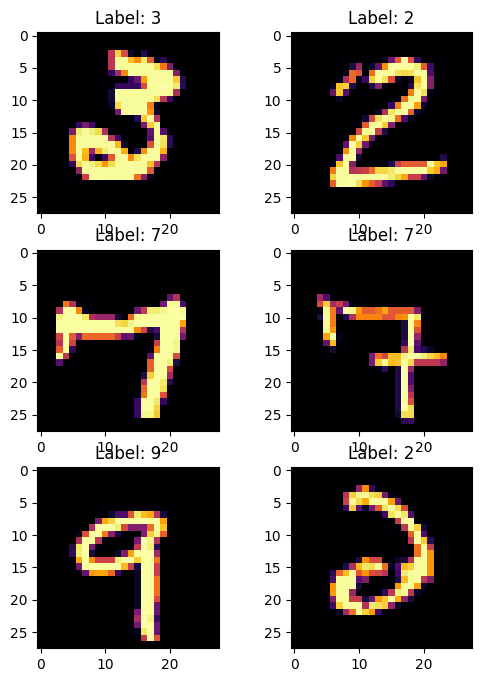

In [ ]:
plt.figure(figsize=(6, 8))
indices = np.random.choice(len(x_train), 6, replace=False)

for i, idx in enumerate(indices):
    plt.subplot(3, 2, i + 1)
    plt.imshow(x_train[idx], cmap='inferno')
    plt.title(f'Label: {y_train[idx]}')
plt.show()



##### Step 4: Data Preprocessing

In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the images from 28x28 to 784-dimensional vectors
X_train = x_train.reshape(len(x_train), -1)
X_test = x_test.reshape(len(x_test), -1)

print(X_train.shape)  # (60000, 784)
print(X_test.shape)   # (10000, 784)



(60000, 784)
(10000, 784)


######Step 5: Build the Model Using MiniBatch KMeans

In [ ]:
# No. of clusters (digits 0-9)
total_clusters = len(np.unique(y_test))

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters=total_clusters)

# Convert training data to sparse format for efficiency
X_train_sparse = sparse.csr_matrix(X_train)

# Fit KMeans model
kmeans.fit(X_train_sparse)

# Output cluster labels
print(kmeans.labels_)


[0 6 8 ... 3 3 3]


Step 6: Map Cluster Labels to Actual Digits

In [ ]:
def retrieve_info(cluster_labels, y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i, 1, 0)
        num = np.bincount(y_train[index == 1]).argmax()
        reference_labels[i] = num
    return reference_labels

# Retrieve actual digit labels for each cluster
reference_labels = retrieve_info(kmeans.labels_, y_train)
print(reference_labels)



{0: 3, 1: 1, 2: 1, 3: 6, 4: 2, 5: 7, 6: 0, 7: 6, 8: 9, 9: 3}


Step 7: Assign Labels to Each Image

In [ ]:
number_labels = np.zeros(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

print(number_labels[:20].astype('int'))  # Predicted labels for the first 20 images
print(y_train[:20])                      # True labels


[3 0 9 1 7 2 1 3 1 7 3 1 3 6 1 7 2 1 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


Step 8: Accuracy Calculation

In [ ]:
accuracy = accuracy_score(number_labels, y_train)
print("Accuracy:", accuracy)



Accuracy: 0.5342333333333333


Step 9: Optimizing the Algorithm

In [ ]:
print("Inertia:", kmeans.inertia_)


Inertia: 2377120.5
